In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
    # per desfer la opció: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [15]:
rounddf=pd.read_csv("round.csv")
sessiondf=pd.read_csv("session.csv")
userdf=pd.read_csv("user.csv")
userrounddf=pd.read_csv("userround.csv")
qadf=pd.read_excel("QuestionsAnswers.xlsx")
display()

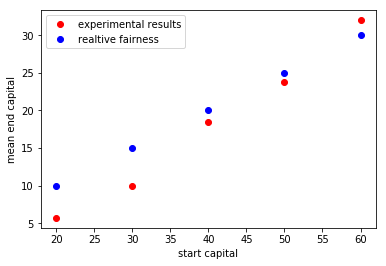

In [3]:
# mean end capital as a function of start capital
scvector=[20.0,30.0,40.0,50.0,60.0]
sumvector=[0.0,0.0,0.0,0.0,0.0]
counter=[0,0,0,0,0]
for i in range(len(userdf)):
    for k in range(5):
        if (userdf.loc[i,"start_capital"]==scvector[k]):
            sumvector[k]=sumvector[k]+userdf.loc[i,"end_capital"]
            counter[k]=counter[k]+1
for k in range(5):
    sumvector[k]=sumvector[k]/float(counter[k])
plt.plot(scvector,sumvector,"ro",label="experimental results")
fairvector=list(range(5))
for i in range(5):
    fairvector[i]=0.5*scvector[i]
plt.plot(scvector,fairvector,"bo",label="realtive fairness")
plt.xlabel("start capital")
plt.ylabel("mean end capital")
plt.legend()
plt.show()

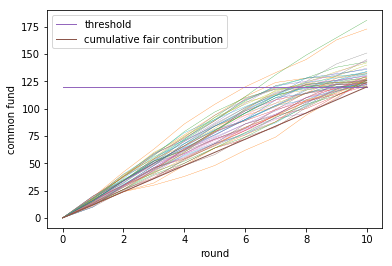

In [4]:
# evolution of funds through the rounds
roundi=list(range(0,11))
roundlist=(0,1,2,3,4,5,6,7,8,9,10)
for i in range(1,55):
    roundi=rounddf.loc[rounddf["session_id"]==i]
    roundi=roundi[["end_pot"]]
    roundi.index=roundi.index%10
    roundi.loc[-1] = [120]
    roundi.index = roundi.index + 1
    roundi.sort_index(inplace=True)
    for j in range (0,11):
        roundi.loc[j]=120-roundi.loc[j]
    plt.plot(roundlist,roundi,lw=0.3)
plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
plt.xlabel("round")
plt.ylabel("common fund")
plt.legend()
plt.show()

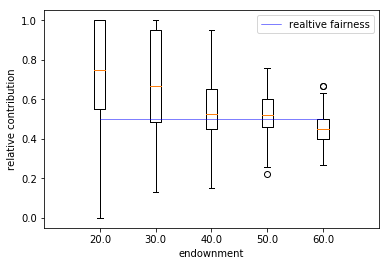

In [5]:
# relative contributions as a function of start capital with boxplot
scvect=[20.0,30.0,40.0,50.0,60.0]
data=[[],[],[],[],[]]
for k in range(5):
    for i in range(len(userdf)):
        if (userdf.loc[i,"start_capital"]==scvect[k]):
            data[k].append(1-userdf.loc[i,"winnings"]/scvect[k])
plt.boxplot(data,positions=scvect,widths=2)
fairvector=(0.5,0.5,0.5,0.5,0.5)
plt.plot(scvect,fairvector,"b-",lw=0.5,label="realtive fairness")
plt.xlabel("endownment")
plt.ylabel("relative contribution")
plt.xlim([10.0,70.0])
plt.legend()
plt.show()

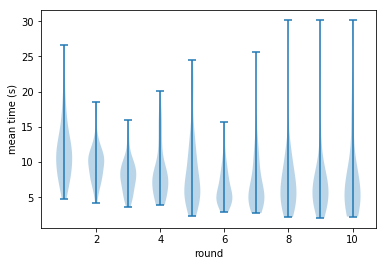

In [6]:
# mean time for each round with violinplot
t1=rounddf["start_time"]
t2=rounddf["end_time"]
mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
rounddf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
timebyround=[[],[],[],[],[],[],[],[],[],[]]
for k in range(len(rounddf)):
    timebyround[k%10].append(rounddf.loc[k,"time"])
plt.violinplot(timebyround,positions=[1,2,3,4,5,6,7,8,9,10])
plt.xlabel("round")
plt.ylabel("mean time (s)")
plt.show()

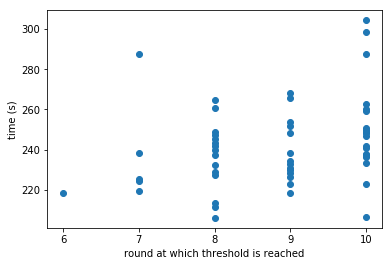

In [7]:
# correlation between time and round with threshold achieved
t1=sessiondf["start_date"]
t2=sessiondf["end_date"]
mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
sessiondf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
thresholdround=[]
for k in range(len(rounddf)):
    pot1=rounddf.loc[k,"start_pot"]
    pot2=rounddf.loc[k,"end_pot"]
    if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
        thresholdround.append(rounddf.loc[k,"num_round"])
thresholdround=pd.DataFrame(thresholdround)
plt.scatter(thresholdround,sessiondf["time"])
plt.xlabel("round at which threshold is reached")
plt.ylabel("time (s)")
plt.xticks([6,7,8,9,10])
plt.show()

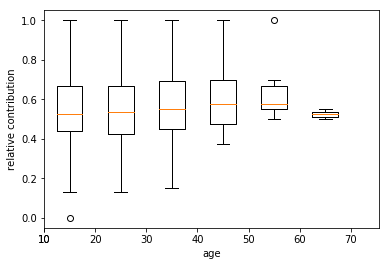

In [8]:
# relative contribution dependence on age
data=[[],[],[],[],[],[],[]]
for k in range(7):
    for i in range(len(userdf)):
        if (userdf.loc[i,"age"]>=10*(k+1) and userdf.loc[i,"age"]>10*(k+2)):
            data[k].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"start_capital"])
plt.boxplot(data,positions=[15,25,35,45,55,65,75],widths=5)
plt.xticks([10,10,20,30,40,50,60,70],[10,10,20,30,40,50,60,70])
plt.xlabel("age")
plt.ylabel("relative contribution")
plt.show()

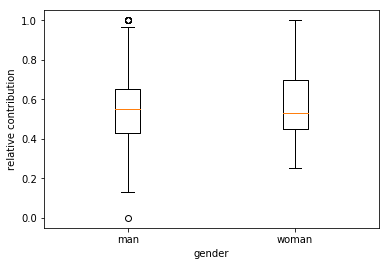

In [9]:
# relative contribution dependence on gender
data=[[],[]]
for i in range(len(userdf)):
    if (userdf.loc[i,"gender"]=="h"):
        data[0].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"start_capital"])
    if (userdf.loc[i,"gender"]=="d"):
        data[1].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"start_capital"])
plt.boxplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("relative contribution")
plt.show()

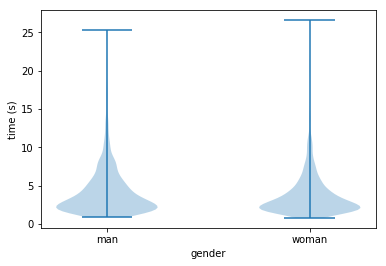

In [16]:
# mean time depending on gender
thisdf=userrounddf
data=[[],[]]
for i in range(len(userrounddf)):
    thisdf.loc[i,"start_time"]=rounddf.loc[i//6,"start_time"]
for j in range(len(thisdf)):
    if (pd.isna(thisdf.loc[j,"timestamp"])==False and pd.isna(thisdf.loc[j,"start_time"])==False):
        time1=str(thisdf.loc[j,"timestamp"])
        time0=str(thisdf.loc[j,"start_time"])
        mcs=float(time1[-6:])-float(time0[-6:])
        sec=float(time1[-9:-7])-float(time0[-9:-7])
        mnt=float(time1[-12:-10])-float(time0[-12:-10])
        hr=float(time1[-15:-13])-float(time0[-15:-13])
        time=3600.0*hr+60.0*mnt+sec+mcs/1000000.0
        if (userdf.loc[thisdf.loc[j,"user_id"]-1,"gender"]=="h" and time>=0):
            data[0].append(time)
        if (userdf.loc[thisdf.loc[j,"user_id"]-1,"gender"]=="d" and time>=0):
            data[1].append(time)
plt.violinplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("time (s)")
plt.show()

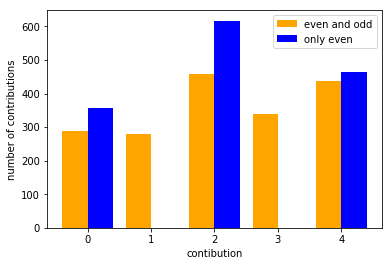

In [11]:
# number of contribution of each value
oddity=[0]*max(rounddf["session_id"])
for k in range(max(rounddf["session_id"])):
    for i in range(len(userrounddf)):
        if ((userrounddf.loc[i,"round_id"]-1)//10==k and userrounddf.loc[i,"has_seleced"]==1):
            oddity[k]+=int(userrounddf.loc[i,"option_selected"])%2
count1=[0,0,0,0,0]
count2=[0,0,0,0,0]
thisdf=userrounddf
for i in range(len(thisdf)):
    if (oddity[i//60]!=0):
        for n in [0,1,2,3,4]:
            if (userrounddf.loc[i,"option_selected"]==n):
                count1[n]+=1
    if (oddity[i//60]==0):
        for n in [0,2,4]:
            if (userrounddf.loc[i,"option_selected"]==n):
                count2[n]+=1
plt.bar([-0.2,0.8,1.8,2.8,3.8],count1,color="orange",label="even and odd",width=0.4)
plt.bar([0.2,1.2,2.2,3.2,4.2],count2,color="blue",label="only even",width=0.4)
plt.xlabel("contibution")
plt.ylabel("number of contributions")
plt.legend()
plt.show()

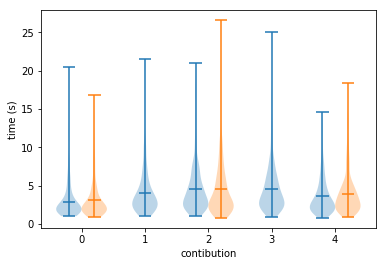

In [12]:
# mean time depending on contribution
oddity=[0]*max(rounddf["session_id"])
for k in range(max(rounddf["session_id"])):
    for i in range(len(userrounddf)):
        if ((userrounddf.loc[i,"round_id"]-1)//10==k and userrounddf.loc[i,"has_seleced"]==1):
            oddity[k]+=int(userrounddf.loc[i,"option_selected"])%2
time2=[[],[],[]]
time3=[[],[],[],[],[]]
thisdf=userrounddf
for j in range(len(userrounddf)):
    thisdf.loc[j,"start_time"]=rounddf.loc[j//6,"start_time"]
for i in range(len(thisdf)):
    if (pd.isna(thisdf.loc[i,"timestamp"])==False and pd.isna(thisdf.loc[i,"start_time"])==False):
        time1=str(thisdf.loc[i,"timestamp"])
        time0=str(thisdf.loc[i,"start_time"])
        mcs=float(time1[-6:])-float(time0[-6:])
        sec=float(time1[-9:-7])-float(time0[-9:-7])
        mnt=float(time1[-12:-10])-float(time0[-12:-10])
        hr=float(time1[-15:-13])-float(time0[-15:-13])
        time=3600.0*hr+60.0*mnt+sec+mcs/1000000.0
        # la jugada amb id=2726 té un temps menor a zero per error
        if (oddity[i//60]!=0 and time>=0):
            for n in [0,1,2,3,4]:
                if (userrounddf.loc[i,"option_selected"]==n):
                    time3[n].append(time)
        if (oddity[i//60]==0 and time>=0):
            for n in [0,1,2]:
                if (userrounddf.loc[i,"option_selected"]==2*n):
                    time2[n].append(time)
plt.violinplot(time3,positions=[-0.2,1,1.8,3,3.8],widths=0.4,showmeans=True)
plt.violinplot(time2,positions=[0.2,2.2,4.2],widths=0.4,showmeans=True)
plt.xlabel("contibution")
plt.ylabel("time (s)")
plt.show()

In [13]:
# Gini coefficient
income=userdf.sort_values("winnings")
income=income["winnings"]
income.dropna(inplace=True)
income.reset_index(drop=True,inplace=True)
sum1=0.0
sum2=0.0
n=len(income)
for i in range(n):
    sum1+=income[i]
    for j in range(n):
        sum2+=abs(income[i]-income[j])
gini=sum2/(2*n*sum1)
print("Gini coefficient:",gini)

Gini coefficient: 0.27167176640736324


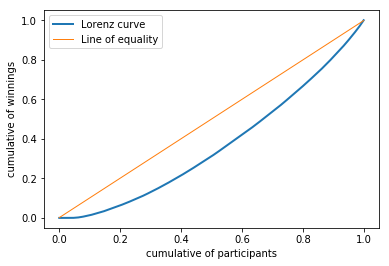

In [14]:
# Lorenz curve
income=userdf.sort_values("winnings")
income=income[["winnings","id"]]
income.dropna(inplace=True)
n=len(income)
income.reset_index(drop=True,inplace=True)
cumulative=[]
for i in range (n):
    if (i==0):
        cumulative.append(income.loc[i,"winnings"])
    else:
        cumulative.append(cumulative[i-1]+income.loc[i,"winnings"])
    income.loc[i,"id"]=(i+0.5)/n
income['cumulative']=cumulative/max(cumulative)
plt.plot(income["id"],income["cumulative"],lw=2,label="Lorenz curve")
plt.plot(income["id"],income["id"],lw=1,label="Line of equality")
plt.xlabel("cumulative of participants")
plt.ylabel("cumulative of winnings")
plt.legend()
plt.show()